# Exercise Sheet 2: Neural Networks 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def logistic(h,a=1):
    return 1/(1+np.exp(-a*h))
def dlogistic(h,a=1):
    return logistic(h,a)-np.power(logistic(h,a),2)

signtrafunc=lambda x: (np.sign(x)+1)/2

def gaussRBF(h,a=1):
    return np.exp(-(a*h)**2)

def dgaussRBF(h,a=1):
    return -2*a*h*np.exp(-(a*h)**2)

class neuron:    
    
    def __init__(self,w,b=0,trafunc=logistic,dtrafunc=dlogistic):
        self.w=np.array(w)
        self.b=np.array(b)
        self.trafunc=trafunc
        self.dtrafunc=dtrafunc
        
    def out(self, x):
        return self.trafunc(np.dot(self.w,x)-self.b)    

## Task 1: Gradient Descent on a single neuron (4 points - programming)
Rewrite the neuron class given and include the Gradient Descent training algorithm as a method. Use the sum of squares error to measure the output error.

Add a method calculating the last local error ($\delta$) of the neuron and one for training the neuron using the derivative of the ouput error $\frac{dE}{dy}=y-o$.
Keep the last input $x$, last output $y$, last activation $h$ and last delta $\delta$ values as object attributes, whenever they are recalculated.
The values of $h$,$x$,$y$ and $o$ are all to be taken as those of the current training data (= their last calculation).

The forumla you need is: $\delta = f'(h_i) \left(y-o\right)$. 

The train function updates the weights by the gradient descent weight update rule $w(t+1)=w(t)-\eta\delta(t)\cdot x(t)$ and the bias by $b(t+1)=b(t)-\eta\delta(t)$ with $\eta$ being the learning rate. As input arguments it should get the derivative of the output error $\frac{dE}{dy}=y-o$ and the learning rate.


In [4]:
class neuron:    

    def __init__(self,w,b,trafunc=logistic,dtrafunc=dlogistic):
        self.w=np.array(w)
        self.b=np.array(b)
        self.trafunc=trafunc
        self.dtrafunc=dtrafunc
        
    def out(self, x):
        self.lastout = self.trafunc(np.dot(self.w,x)-self.b)
        self.last_h = np.dot(self.w,x)-self.b
        self.last_x = x
        return self.lastout, last.x, last.h
    
    def delta(self,dE):
        self.lastdelta = self.dtrafunc*dE*self.w
        return self.lastdelta
    
    def train(self,dE,learnrate=0.1):
        self.lastdelta = self.dtrafunc*dE
        self.w = self.w - learnrate*self.lastdelta*self.last_x
        self.b = self.b - learnrate*self.lastdelta   
        
        return self.lastdelta
    
        
        

## Task 2: logical functions (2 points - programming)
Train a single neuron on the logical functions below for a two-dimensional input $x$. Use instances of the neuron class above to build the equivalents to logical "or","and" and "xor"-functions and test them for 2-dimensional input vectors *x* resembling all possibilities of combinations ([0,0] [1,0], [0,1], [1,1]). Do 10.000 iterations and plot the evolution of the error (the error over the iteration number). You don't need to implement a stopping criterion.

Set the learning rate to $\eta=1$ and initialize the weight $w$ and the bias $b$ randomly with normal distribution (np.random.randn).

In the next cell you find an exemplary random number generator and the corresponding functions you can use for sample creation in every single iteration. In every iteration use the random input $x$, the neuron output *$y=$neuron.out($x$)* and the training data $o=yourlogicalfunction(x)$

If you haven't succeeded with task 1, you can import Exercise2helperPy37 or Exercise2helperPy27 depending on your python version. The syntax of the conained neuron class is: n1=Exercise2helper.neuron(np.random.randn(2),np.random.randn(1)) for initialization and train(deltanext,weightsnext,learnrate=0.1) for training. For a single neuron as for the last layer neurons, the delta of the following neuron is replaced by the error graident of the output $\delta_k=\left(y-o\right)$ and the corresponding weight is $w_k=1$ as every output neuron in the model has only one unscaled output.

Repeat the training for

a) the logistic function

b) the gaussian Radial Basis Function

In [2]:
import Exercise2helper37 as helper

### a) AND function

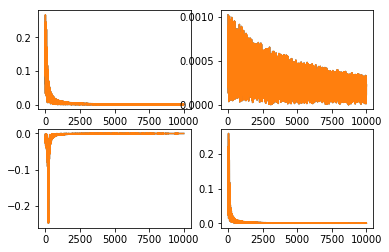

In [78]:
# Logistic

neuron1=helper.neuron(np.random.randn(2),np.random.randn())
def logical_and(x) :
    if all(x) == 1:
        return 1
    else:
        return 0


w = np.random.rand(2)
b = np.random.rand()
learning_rate = 0.1

X = [[0,0], [0,1],[1,1],[1,0]]
N = 0
for i in X:
    x = i
    N += 1
    plt.subplot(len(X)/2,len(X)/2,N)
    neuron1.out(x)
    list_1 = []
    for i in range(10000):
        list_1 += [neuron1.train(neuron1.out(x) - logical_and(x), np.random.rand(2)) ]
    plt.plot(list_1)

    
    

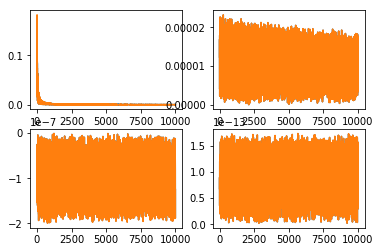

In [79]:
# gaussRBF
neuron2 = helper.neuron(np.random.randn(2),np.random.randn(),trafunc= gaussRBF, dtrafunc= dgaussRBF)


X = [[0,0], [0,1],[1,1],[1,0]]
N = 0
for i in X:
    x = i
    N += 1
    plt.subplot(len(X)/2,len(X)/2,N)
    neuron2.out(x)
    list_1 = []
    for i in range(10000):
        list_1 += [neuron2.train(neuron2.out(x) - logical_and(x), np.random.rand(2)) ]
    plt.plot(list_1)

    



### b) OR function

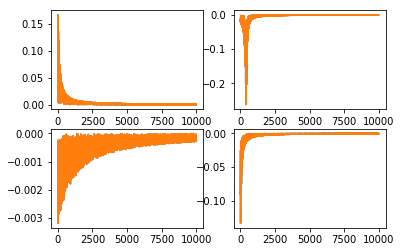

In [80]:
neuron1=helper.neuron(np.random.randn(2),np.random.randn())
def logical_or(x) :
    if any(x) == 1:
        return 1
    else:
        return 0


w = np.random.rand(2)
b = np.random.rand()
learning_rate = 0.1

X = [[0,0], [0,1],[1,1],[1,0]]
N = 0
for i in X:
    x = i
    N += 1
    plt.subplot(len(X)/2,len(X)/2,N)
    neuron1.out(x)
    list_1 = []
    for i in range(10000):
        list_1 += [neuron1.train(neuron1.out(x) - logical_or(x), np.random.rand(2)) ]
    plt.plot(list_1)


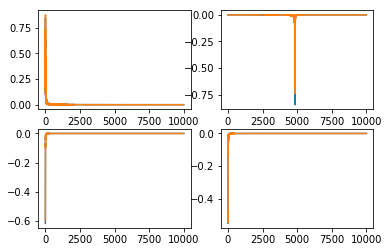

In [81]:
# gaussRBF
neuron2 = helper.neuron(np.random.randn(2),np.random.randn(),trafunc= gaussRBF, dtrafunc= dgaussRBF)


X = [[0,0], [0,1],[1,1],[1,0]]
N = 0
for i in X:
    x = i
    N += 1
    plt.subplot(len(X)/2,len(X)/2,N)
    neuron2.out(x)
    list_1 = []
    for i in range(10000):
        list_1 += [neuron2.train(neuron2.out(x) - logical_or(x), np.random.rand(2)) ]
    plt.plot(list_1)


### c) XOR function

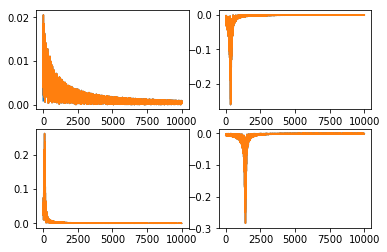

In [83]:
def logical_xor(x):
    if len(np.unique(x)) == len(x):
        return 1
    else:
        return 0 
    
neuron1=helper.neuron(np.random.randn(2),np.random.randn())

X = [[0,0], [0,1],[1,1],[1,0]]
N = 0
for i in X:
    x = i
    N += 1
    plt.subplot(len(X)/2,len(X)/2,N)
    neuron1.out(x)
    list_1 = []
    for i in range(10000):
        list_1 += [neuron1.train(neuron1.out(x) - logical_xor(x), np.random.rand(2)) ]
    plt.plot(list_1)

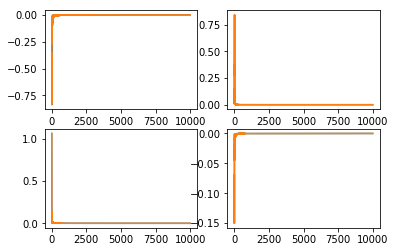

In [84]:
# gaussRBF
neuron2 = helper.neuron(np.random.randn(2),np.random.randn(),trafunc= gaussRBF, dtrafunc= dgaussRBF)


X = [[0,0], [0,1],[1,1],[1,0]]
N = 0
for i in X:
    x = i
    N += 1
    plt.subplot(len(X)/2,len(X)/2,N)
    neuron2.out(x)
    list_1 = []
    for i in range(10000):
        list_1 += [neuron2.train(neuron2.out(x) - logical_xor(x), np.random.rand(2)) ]
    plt.plot(list_1)


## Task 3: Prepare the neuron for the MLP (2 point - programming)
Rewrite the neuron class again now preparing it to be used in an MLP, which we will actually implement next week.
To this extent, you need to make the link between the following neurons, connected by weights $w_k$ and their delta $\delta_k$, and the current neuron.

The forumla you need is: $\delta_i = f'(h_i) \sum_k w_k \delta_k$, where i is the index of the current neuron and k is the index of the following neurons (connected to it's output). For a single neuron as for the last layer neurons, the delta of the following neuron is replaced by the error graident of the output $\delta_k=\left(y-o\right)$ and the corresponding weight is $w_k=1$ as every output neuron in the model has only one unscaled output.

The train function updates the weights again by the gradient descent weight update rule $w(t+1)=w(t)-\eta\delta_i(t)\cdot x(t)$ and the bias by $b(t+1)=b(t)-\eta\delta_i(t)\cdot$.


In [85]:
class neuron:    
    
    def __init__(self,w,b,trafunc=logistic,dtrafunc= dlogistic ):
        self.w=np.array(w)
        self.b=np.array(b)
        self.trafunc=trafunc
        self.dtrafunc=dtrafunc
    def out(self, x):
        self.last_h = np.dot(x,self.w) - self.b
        self.last_x = x
        self.lastout = trafunc(self.last_h) 
        return self.lastout, self.last_h, self.last_x
    
    def delta(self,deltanext,weightsnext):
        self.lastdelta = dtrafunc(self.last_h)*np.dot(weightsnext*deltanext)
        return self.lastdelta
    
    def train(self,deltanext,weightsnext,learnrate=0.1):
        delta(weightsnext,deltanext)
        self.w = self.w - self.lastdelta*learnrate*self.last_x
        self.b = self.b + self.lastdelta*learnrate
    

        return self.lastdelta

## Task 4: MLP layer (3 points - programming)
Use the class "neuron" to construct a neural layer class "MLPlayer" for a Multi-Layer Perceptron (MLP).
It should contain a list "MLPlayer.nodes" which is a list of the single neurons. 
Also, there should be a method "MLPlayer.out(x)" that returns the outputs of the single neurons as a list for the different neurons' current weights and bias of the input vector "x". Initialize the weights and the biases of the single neurons randomly with normal distribution by default (np.random.randn()).

Include a method "MLPlayer.train(deltanext,W,learnrate)" which iterates the training over the nodes by calling their "train()" method with the deltas of the nextlayers and the corresponding weights. W is matrix consisiting of the weights of of all neurons in the next layer. It should return the deltas and weight matrix W of the current layer.

The number of outputs is equivalent to the number of nodes in the layer and the number of inputs corresponds with the number of weights per neuron. The number of neurons and the number of weights per neuron should be passed to the initialization method.

In [86]:
class MLPlayer:
    
    def __init__(self,NodeNo,WeightNo,weightinit=np.random.randn,biasinit=np.random.randn,trafunc=logistic,dtrafunc=dlogistic):
        nodes = []
        for i in range(NodeNo):
            node += [nueron(weightinit(WeightNo, biasinit(1), trafunc = logistic, dtrafunc = dlogistic))]
        self.nodes = nodes
        return self.nodes
    
    def out(self,x):
        output = []
        for neuron in self.nodes:
            output += [neuron.out(x)]
        self.output = output
        self.x = x
        return self.output, self.x
        
    def train(self,deltanext,W,learnrate=0.1):
        deltas = []
        for neuron in self.nodes:
            deltas += [neuron.train(deltanext , W)]
        W = []
        for neuron in self.nodes:
            W += [neuron.w]
            
            
        return deltas, W

## Task 5 Train an MLP on the XOR (4 points - programming)
Train a Multi-Layer-Perceptron on the logical "xor"-function.Do 10.000 iterations and plot the evolution of the error. You don't need to implement a stopping criterion. Use the logistic function.

Set the learning rate to $\eta=1$.

Investigate the following steps:

a) The network should consist of two layers, where the first has the two input neurons and the second only one output neuron. Does it always converge?

b) The network should consist of two layers, where the first has the three  input neurons and the second only one output neuron. Does it now always converge?

What can we learn from this?

The MLP is already implemented in the helper functions Exercise2helperPy37 or Exercise2helperPy27 (depending on your python version 3.6 or 2.7). In the next task sheet, we will actually implement it ourselves, so if you have free time, you can of course already do that now!
The syntax of the contained MLP class is:
*NeuralNetwork=MLP(NoInputs,ListNoNeuronsPerLayer)*
for initialization and 
*errors=NeuralNetwork.train(NoIterations,x, o ,learnrate)* for training. $x$ and $o$ can either be function pointers as defined or arrays of samples. If they are functions, $x$ has to produce a random array of inputs of size [NoInputs,] and $o(x)$ has to produce the corresponding target function output. If they are samples they have to have the shape *x.shape=[NoIterations,NoInputs]* and *o.shape=[NoIterations,NoOutputs]*.



In [87]:

LayerNos=[2,1]
NeuralNetwork=helper.MLP(2,LayerNos)
